In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Difdoug\Difdoug_NW_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,2.4696,0.21541,3.09000,0.78343,0.51035,0.03043,0.100660
1,0.029389,0.206580,0.48861,1.43430,3.12990,1.2778,1.42850,0.14333,1.19480,2.13180,0.98473,3.844500
2,-1.115400,0.217560,1.61050,1.33710,3.76820,1.2100,3.99630,2.21730,3.90290,1.51440,2.43890,0.633580
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,NaN,1.66010,2.35270,0.66126,3.13510,3.93810,3.734600
4,-0.268400,-1.006000,2.88220,1.56160,3.20140,3.3774,1.52260,0.98475,3.10940,3.65640,3.91720,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.70480,0.88269,NaN,1.62780,3.29400,1.08500,0.15740,0.46504,2.851400
396,0.264630,-6.107600,NaN,1.33770,1.41870,1.6861,1.09510,NaN,0.12790,0.54249,3.36580,3.755600
397,-3.479100,-1.993300,1.32480,1.77210,2.55090,1.4701,0.92540,1.84110,3.47730,0.95496,1.52630,2.123800
398,7.293000,-0.411470,NaN,0.39655,2.99900,3.4101,2.95160,0.27800,0.99059,3.43740,1.81620,0.087212


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	25
float64		column 2	18
float64		column 3	36
float64		column 4	12
float64		column 5	18
float64		column 6	12
float64		column 7	12
float64		column 8	25
float64		column 9	0
float64		column 10	6
float64		column 11	31
float64		column 12	24


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,375.000000,382.000000,364.000000,388.000000,382.000000,388.000000,388.000000,375.000000,400.000000,394.000000,369.000000,376.000000
mean,-0.159984,0.050788,2.042114,1.901675,1.934000,1.996116,2.026161,1.977590,1.968800,2.039127,1.985395,1.981945
std,2.508317,2.763754,1.121371,1.144296,1.158302,1.136755,1.155720,1.125243,1.147266,1.155290,1.137424,1.182926
min,-7.771000,-6.828400,0.005583,0.005376,0.000530,0.018503,0.003618,0.007321,0.007019,0.055837,0.006786,0.001972
25%,-0.686140,-0.822895,1.130950,0.947260,0.882807,1.055775,1.012633,1.048900,1.006645,1.043850,0.984730,0.962440
50%,-0.085604,0.009048,2.091100,1.777500,1.921050,2.031600,2.101400,1.951100,2.074650,2.096400,1.920700,1.943700
75%,0.705375,0.887540,2.958175,2.836900,2.951250,2.966250,2.969400,2.953600,2.933775,3.046400,2.967000,2.999525
max,8.409300,6.777100,3.976400,3.993400,3.979000,3.992300,3.996300,3.995000,3.985500,3.984300,3.967600,3.996000


<AxesSubplot:>

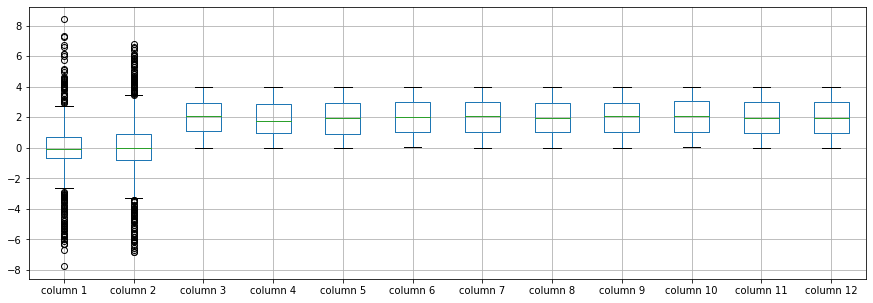

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    -0.159984
column 2     0.050788
column 3     2.042114
column 4     1.901675
column 5     1.934000
column 6     1.996116
column 7     2.026161
column 8     1.977590
column 9     1.968800
column 10    2.039127
column 11    1.985395
column 12    1.981945
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,0.054150,-0.051358,-0.057787,0.030122,0.005268,-0.040631,0.029968,0.004602,0.028326,0.063014,-0.051104
column 2,0.054150,1.000000,-0.040133,0.033984,-0.066353,-0.089265,0.016865,-0.023875,-0.009528,0.015066,0.011490,0.070741
column 3,-0.051358,-0.040133,1.000000,0.018756,-0.050222,-0.057087,-0.059614,0.046062,0.112933,-0.058461,-0.138610,-0.008343
column 4,-0.057787,0.033984,0.018756,1.000000,0.003899,0.079984,0.022361,0.120530,0.020328,0.057991,-0.031866,-0.054612
column 5,0.030122,-0.066353,-0.050222,0.003899,1.000000,0.064885,0.021105,0.018070,-0.005264,0.010840,0.037349,-0.054120
column 6,0.005268,-0.089265,-0.057087,0.079984,0.064885,1.000000,0.017303,0.066657,-0.000708,-0.005574,0.029516,-0.027236
column 7,-0.040631,0.016865,-0.059614,0.022361,0.021105,0.017303,1.000000,-0.024606,0.092843,0.041791,0.019099,-0.058990
column 8,0.029968,-0.023875,0.046062,0.120530,0.018070,0.066657,-0.024606,1.000000,0.063562,-0.118936,-0.060815,-0.023357
column 9,0.004602,-0.009528,0.112933,0.020328,-0.005264,-0.000708,0.092843,0.063562,1.000000,0.009916,-0.008170,0.033585
column 10,0.028326,0.015066,-0.058461,0.057991,0.010840,-0.005574,0.041791,-0.118936,0.009916,1.000000,0.045948,0.012742


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+24,12+24+24,12+24+24+24,12+24+24+24+24,12+24+24+24+24+24,12+24+24+24+24+24+24,12+24+24+24+24+24+24+24,12+24+24+24+24+24+24,12+24+24+24+24+24,12+24+24+24+24,12+24+24+24,12+24+24,12+24,12], vae_layer = False, seed = 24)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 26.649753799438475
Epoch: 1 , loss: 26.517108459472656
Epoch: 2 , loss: 26.516791305541993
Epoch: 3 , loss: 26.432325820922852
Epoch: 4 , loss: 26.37284324645996
Epoch: 5 , loss: 26.110457305908202
Epoch: 6 , loss: 24.96776611328125
Epoch: 7 , loss: 22.65378677368164
Epoch: 8 , loss: 21.673899459838868
Epoch: 9 , loss: 21.27140686035156
Epoch: 10 , loss: 21.057722244262695
Epoch: 11 , loss: 20.87368721008301
Epoch: 12 , loss: 20.49660858154297
Epoch: 13 , loss: 20.53082695007324
Epoch: 14 , loss: 19.900019760131837
Epoch: 15 , loss: 20.231823654174804
Epoch: 16 , loss: 20.045707015991212
Epoch: 17 , loss: 19.53362030029297
Epoch: 18 , loss: 19.465027618408204
Epoch: 19 , loss: 19.359921493530273
Epoch: 20 , loss: 19.243150329589845
Epoch: 21 , loss: 19.059026336669923
Epoch: 22 , loss: 18.87462936401367
Epoch: 23 , loss: 18.97813018798828
Epoch: 24 , loss: 18.85546859741211
Epoch: 25 , loss: 18.8054631

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(400, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    -0.70595
column 2     0.12893
column 3     1.05810
column 4     2.13620
column 5     2.14860
column 6     2.24580
column 7     3.72770
column 8     2.22720
column 9     1.94350
column 10    1.98700
column 11    2.47070
column 12    0.36826
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Difdoug.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.340840,0.0,0.000000,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.000000,0.0,0.0,0.903128,0.0,0.000000,0.0,0.0,0.000000,0.0
396,0.0,0.0,-2.660129,0.0,0.0,0.000000,0.0,-2.560226,0.0,0.0,0.000000,0.0
397,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
398,0.0,0.0,-1.176041,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(28.976485458428172, 163.27447192538312)

In [17]:
NRMS=numerator/denominator
NRMS


0.17747101011400304

In [18]:
new_df.iloc[66,:]

column 1     0.82272
column 2     0.26776
column 3     0.40343
column 4     1.18720
column 5     3.95660
column 6     2.58300
column 7     2.83060
column 8     3.07420
column 9     1.53810
column 10    0.24620
column 11    0.85334
column 12    3.60440
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.978900,1.83630,2.88660,2.469600,0.21541,3.090000,0.78343,0.51035,0.030430,0.100660
1,0.029389,0.206580,0.488610,1.43430,3.12990,1.277800,1.42850,0.143330,1.19480,2.13180,0.984730,3.844500
2,-1.115400,0.217560,1.610500,1.33710,3.76820,1.210000,3.99630,2.217300,3.90290,1.51440,2.438900,0.633580
3,-0.539160,-0.061874,0.364860,0.33278,0.19027,0.908000,1.66010,2.352700,0.66126,3.13510,3.938100,3.734600
4,-0.268400,-1.006000,2.882200,1.56160,3.20140,3.377400,1.52260,0.984750,3.10940,3.65640,3.917200,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.725800,3.70480,0.88269,1.257188,1.62780,3.294000,1.08500,0.15740,0.465040,2.851400
396,0.264630,-6.107600,1.245271,1.33770,1.41870,1.686100,1.09510,1.233374,0.12790,0.54249,3.365800,3.755600
397,-3.479100,-1.993300,1.324800,1.77210,2.55090,1.470100,0.92540,1.841100,3.47730,0.95496,1.526300,2.123800
398,7.293000,-0.411470,1.318759,0.39655,2.99900,3.410100,2.95160,0.278000,0.99059,3.43740,1.816200,0.087212


In [20]:
imputations[-1].to_excel("Difdoug_NW_5(imp).xlsx", index=False, header=False)